In [ ]:
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from google.colab import files

In [ ]:
upload=files.upload()

Saving QnQ data.xlsx to QnQ data.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(upload.get('QnQ data.xlsx')))

In [ ]:
df

,id,day,hours,gender,How_lesson_have_you_gone_through?,Body_temperature
0,1,2023-01-16,12:21:00,male,2,36.5
1,2,2023-01-16,12:21:00,male,2,36.6
2,3,2023-01-16,12:22:00,male,2,36.8
3,4,2023-01-16,12:24:00,male,2,36.6
4,5,2023-01-16,12:24:00,male,2,36.8
5,6,2023-01-16,12:25:00,male,2,36.5
6,7,2023-01-16,12:26:00,male,2,36.8
7,8,2023-01-16,12:28:00,male,2,36.3
8,9,2023-01-16,12:32:00,female,2,36.3
9,10,2023-01-16,12:45:00,female,2,36.7


In [ ]:
df.Body_temperature.describe()

count    35.000000
mean     36.580000
std       0.208355
min      36.200000
25%      36.400000
50%      36.600000
75%      36.750000
max      36.900000
Name: Body_temperature, dtype: float64

In [ ]:
temp_obs=df.Body_temperature.sort_values()

In [ ]:
bin_values = np.arange(start=temp_obs.min(), stop=temp_obs.max(), step=.05)

In [ ]:
mu, std = temp_obs.mean(),temp_obs.std()

In [ ]:
p=norm.pdf(temp_obs,mu,std)

In [ ]:
temp_mean = df.Body_temperature.mean()
temp_std = df.Body_temperature.std()
temp_mean

36.580000000000005

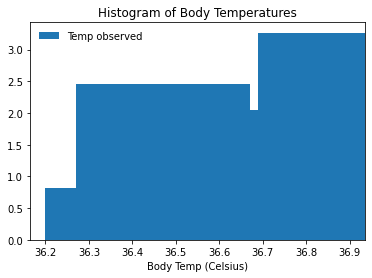

In [ ]:
plt.hist(df.Body_temperature, width=0.4, density=True, label='Temp observed')
plt.xlabel('Body Temp (Celsius)')
plt.title('Histogram of Body Temperatures')

temp_mean = df.Body_temperature.mean()
temp_std = df.Body_temperature.std()

plt.legend(loc='best', frameon=False)
plt.show()

In [ ]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

(array([2., 0., 6., 0., 0., 3., 0., 0., 2., 0., 0., 5., 0., 0., 8., 0., 0.,
        8., 0., 1.]),
 array([36.2  , 36.235, 36.27 , 36.305, 36.34 , 36.375, 36.41 , 36.445,
        36.48 , 36.515, 36.55 , 36.585, 36.62 , 36.655, 36.69 , 36.725,
        36.76 , 36.795, 36.83 , 36.865, 36.9  ]),
 <a list of 20 Patch objects>)

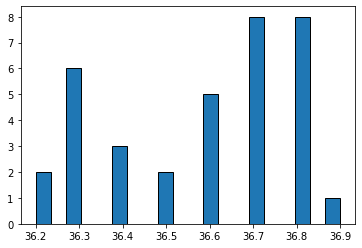

In [ ]:
#check distribution
plt.hist(df.Body_temperature,edgecolor='black',bins=20)

In [ ]:
#storing the body temperature value to new variable
temp=df['Body_temperature']

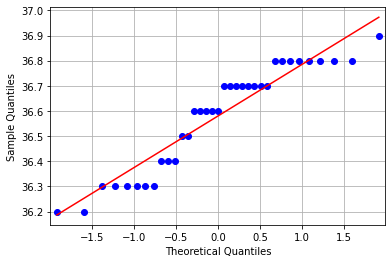

In [ ]:
#check the variations normal
import statsmodels.api as sm
sm.qqplot(temp,line='s')
plt.grid(True)

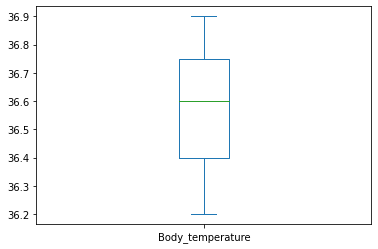

In [ ]:
#checking the outliers
temp.plot(kind='box')

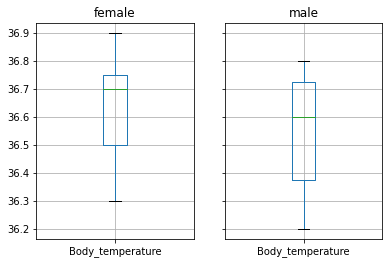

In [ ]:
male_temperature=df[df['gender']=='male']['Body_temperature']
female_temperature=df[df['gender']=='female']['Body_temperature']

df[['gender', 'Body_temperature']].groupby('gender').boxplot(return_type='axes');

**Manual Data Outliers**

In [ ]:
q1=df.describe()['Body_temperature']['25%']
q1

36.4

In [ ]:
q3=df.describe()['Body_temperature']['75%']
q3

36.75

In [ ]:
iqr=q3-q1
iqr

0.3500000000000014

In [ ]:
upper_fence=q3+(1.5*iqr)
upper_fence

37.275000000000006

In [ ]:
lower_fence=q1-(1.5*iqr)
lower_fence

35.875

In [ ]:
#data outliers
df[(df["Body_temperature"]<lower_fence)|(df["Body_temperature"]>upper_fence)]

,id,day,hours,gender,How_lesson_have_you_gone_through?,Body_temperature


Checking male and female

In [ ]:
gender_data_temperature=df[['gender','Body_temperature']]
gender_data_temperature

,gender,Body_temperature
0,male,36.5
1,male,36.6
2,male,36.8
3,male,36.6
4,male,36.8
5,male,36.5
6,male,36.8
7,male,36.3
8,female,36.3
9,female,36.7


In [ ]:
#checking male data only
male_only_data=df[df["gender"]=='male']
male_only_data

,id,day,hours,gender,How_lesson_have_you_gone_through?,Body_temperature
0,1,2023-01-16,12:21:00,male,2,36.5
1,2,2023-01-16,12:21:00,male,2,36.6
2,3,2023-01-16,12:22:00,male,2,36.8
3,4,2023-01-16,12:24:00,male,2,36.6
4,5,2023-01-16,12:24:00,male,2,36.8
5,6,2023-01-16,12:25:00,male,2,36.5
6,7,2023-01-16,12:26:00,male,2,36.8
7,8,2023-01-16,12:28:00,male,2,36.3
11,12,2023-01-17,13:32:00,male,2,36.7
12,13,2023-01-17,13:38:00,male,2,36.8


In [ ]:
male_only_data.describe()

,id,How_lesson_have_you_gone_through?,Body_temperature
count,20.000000,20.000000,20.000000
mean,15.600000,1.750000,36.550000
std,10.956373,0.786398,0.213985
min,1.000000,0.000000,36.200000
25%,5.750000,1.750000,36.375000
50%,15.000000,2.000000,36.600000
75%,25.250000,2.000000,36.725000
max,35.000000,3.000000,36.800000


In [ ]:
temp_male_only=male_only_data['Body_temperature']

In [ ]:
result_avg_male=sum(temp_male_only)/len(temp_male_only)
result_avg_male

36.550000000000004

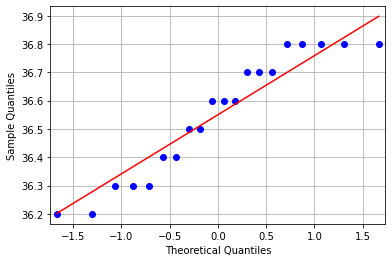

In [ ]:
sm.qqplot(temp_male_only,line='s')
plt.grid(True)

In [ ]:
#checking female data only
female_only_data=df[df["gender"]=='female']
female_only_data

,id,day,hours,gender,How_lesson_have_you_gone_through?,Body_temperature
8,9,2023-01-16,12:32:00,female,2,36.3
9,10,2023-01-16,12:45:00,female,2,36.7
10,11,2023-01-16,12:50:00,female,2,36.8
13,14,2023-01-17,13:39:00,female,1,36.7
14,15,2023-01-17,13:39:00,female,2,36.4
15,16,2023-01-17,13:39:00,female,2,36.9
19,20,2023-01-17,13:41:00,female,1,36.3
20,21,2023-01-17,13:42:00,female,2,36.6
21,22,2023-01-17,13:42:00,female,2,36.7
23,24,2023-01-17,13:48:00,female,1,36.8


In [ ]:
female_only_data.describe()

,id,How_lesson_have_you_gone_through?,Body_temperature
count,15.000000,15.000000,15.000000
mean,21.200000,2.066667,36.620000
std,8.537313,0.703732,0.200713
min,9.000000,1.000000,36.300000
25%,14.500000,2.000000,36.500000
50%,21.000000,2.000000,36.700000
75%,29.500000,2.500000,36.750000
max,34.000000,3.000000,36.900000


In [ ]:
temp_female_only_data=female_only_data["Body_temperature"]
temp_female_only_data

8     36.3
9     36.7
10    36.8
13    36.7
14    36.4
15    36.9
19    36.3
20    36.6
21    36.7
23    36.8
28    36.6
29    36.7
30    36.7
31    36.8
33    36.3
Name: Body_temperature, dtype: float64

In [ ]:
result_avg=sum(temp_female_only_data)/len(temp_female_only_data)
result_avg

36.62

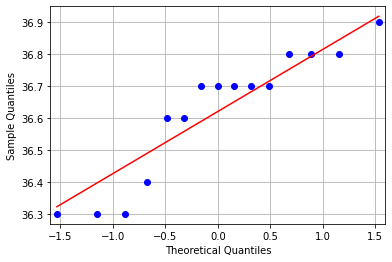

In [ ]:
sm.qqplot(temp_female_only_data,line='s')
plt.grid(True)

In [ ]:
#statistical analysis
#p value
s,p=stats.normaltest(df['Body_temperature'])
print('p value is',p)
if p >= 0.05:
    print('p is greater than 0.05. So the distribution is normal')
else:
    print('p is less than 0.05. So the distribution is NOT normal')


p value is 0.019643712452844363
p is less than 0.05. So the distribution is NOT normal


In [ ]:
#avg female
result_avg_female=sum(temp_female_only_data)/len(temp_female_only_data)
result_avg_female

36.62

In [ ]:
#std female
sample_female_std=temp_female_only_data.std()
sample_female_std

0.20071301473924055

In [ ]:
#avg male
result_avg_male=sum(temp_male_only)/len(temp_male_only)
result_avg_male

36.550000000000004

In [ ]:
#std male
sample_male_std=temp_male_only.std()
sample_male_std

0.21398475105532722

Two Sample T-Test 

In [ ]:
result=stats.ttest_ind(temp_male_only,temp_female_only_data,equal_var=True)
result

Ttest_indResult(statistic=-0.9831211505469335, pvalue=0.3327012120372589)

In [ ]:
!pip install pingouin
import pingouin as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=59dda0c0cdc1162f35089173cba6a3277150e6f6a9f3f4bdcfa9a2a848ab1486
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
results=pg.ttest(temp_male_only,temp_female_only_data,correction=False)
results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.983121,33,two-sided,0.332701,"[-0.21, 0.07]",0.3358,0.476,0.159168


In [ ]:
print('The calculated t-statistic is', results['T'], 'and the p-value is ', results['p-val'])

The calculated t-statistic is T-test   -0.983121
Name: T, dtype: float64 and the p-value is  T-test    0.332701
Name: p-val, dtype: float64


In [ ]:
results.info

<bound method DataFrame.info of                T  dof alternative     p-val          CI95%  cohen-d   BF10  \
T-test -0.983121   33   two-sided  0.332701  [-0.21, 0.07]   0.3358  0.476   

           power  
T-test  0.159168  >

In [ ]:
#taking the p-val value from table
results['p-val'][0]

0.3327012120372589

In [ ]:
cv=1.96
if results['p-val'][0]>=cv:
  print(f"p-value is greater than critical value in both cases. So the difference between male and female skin temperature is zero. Accept null hypothesis")
else:
  print('p-value is less than critical value in both cases. So the differences between male and female skin temperature is not zero. Reject null hypothesis')

p-value is less than critical value in both cases. So the differences between male and female skin temperature is not zero. Reject null hypothesis


In [ ]:
#taking the t-val value from table
results['T'][0]

-0.9831211505469335

In [ ]:
if results['T'][0] >= cv:
    print('t-statistic value is greater than critical value. there is no significance difference between skin temperature in women and men. Accept null hypothesis.')
else:
    print('t-statistic value is less than critical value. there is  significance difference between skin temperature in women and men. Reject null hypothesis.')

t-statistic value is less than critical value. there is  significance difference between skin temperature in women and men. Reject null hypothesis.


Conclusion and results



1.   p-value is less than critical value in both cases. So the differences between male and female skin temperature is not zero. Reject null hypothesis
2.   t-statistic value is less than critical value. there is  significance difference between skin temperature in women and men. Reject null hypothesis.



In [ ]:
results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.983121,33,two-sided,0.332701,"[-0.21, 0.07]",0.3358,0.476,0.159168


In [ ]:
correlation = df. corr ()  
correlation. style. background_gradient (cmap = 'BrBG')  

,id,How_lesson_have_you_gone_through?,Body_temperature
id,1.000000,-0.030287,-0.221793
How_lesson_have_you_gone_through?,-0.030287,1.000000,0.525064
Body_temperature,-0.221793,0.525064,1.000000


In [ ]:
df.describe()

,id,How_lesson_have_you_gone_through?,Body_temperature
count,35.000000,35.000000,35.000000
mean,18.000000,1.885714,36.580000
std,10.246951,0.758149,0.208355
min,1.000000,0.000000,36.200000
25%,9.500000,2.000000,36.400000
50%,18.000000,2.000000,36.600000
75%,26.500000,2.000000,36.750000
max,35.000000,3.000000,36.900000
